In [5]:
pip install dice-ml

In [6]:
# For data manipulation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For feature selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics.pairwise import cosine_similarity


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('Crash_Data.csv')
df.head()

,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,...,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,Mahindra,sedan,2008,diesel,2001,automatic,6,1160,4072,1498,...,1.0,0.0,rural,clear,dry,morning,Monday,75,Male,severe
1,Honda,sedan,2014,CNG,2959,manual,4,1949,3947,1933,...,0.0,1.0,NaN,clear,NaN,night,Saturday,80,Female,severe
2,Tata Motors,SUV,2015,electric,1694,manual,4,1943,4785,1885,...,True,True,rural,clear,dry,afternoon,Monday,41,Female,severe
3,Honda,pickup,2020,CNG,1168,manual,6,1013,3800,1470,...,1.0,1.0,NaN,clear,dry,night,Monday,45,Female,severe
4,Honda,hatchback,2007,CNG,1735,manual,3,2134,4472,1827,...,1.0,1.0,urban,clear,dry,afternoon,NaN,50,Female,severe


In [9]:
df['Vehicle_make'].value_counts()

,Vehicle_make
Maruti Suzuki,2047
Honda,2019
Hyundai,2016
Mahindra,1975
Tata Motors,1943


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Vehicle_make             10000 non-null  object
 1   Vehicle_type             10000 non-null  object
 2   Vehicle_year             10000 non-null  int64 
 3   Engine_type              10000 non-null  object
 4   Engine_displacement      10000 non-null  int64 
 5   Transmission_type        10000 non-null  object
 6   Number_of_cylinders      10000 non-null  int64 
 7   Vehicle_weight           10000 non-null  int64 
 8   Vehicle_length           10000 non-null  int64 
 9   Vehicle_width            10000 non-null  int64 
 10  Vehicle_height           10000 non-null  int64 
 11  Safety_rating            10000 non-null  int64 
 12  Number_of_airbags        10000 non-null  int64 
 13  ABS_presence             9256 non-null   object
 14  ESC_presence             9248 non-null 

In [11]:
df.describe()

,Vehicle_year,Engine_displacement,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,Vehicle_height,Safety_rating,Number_of_airbags,Driver_age
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2010.985700,1970.356100,4.470700,1646.269500,4238.938400,1699.01190,1596.853000,2.478900,4.02680,51.118000
std,6.608696,617.166115,1.236808,490.072865,431.469598,172.99761,115.283913,1.117264,2.00157,19.366806
min,2000.000000,800.000000,3.000000,800.000000,3500.000000,1400.00000,1400.000000,1.000000,1.00000,18.000000
25%,2005.000000,1486.750000,3.000000,1215.750000,3865.000000,1549.00000,1498.000000,1.000000,2.00000,34.000000
50%,2011.000000,2001.000000,4.000000,1645.000000,4235.000000,1699.00000,1594.000000,2.000000,4.00000,51.000000
75%,2017.000000,2500.000000,6.000000,2079.000000,4612.000000,1849.00000,1696.000000,3.000000,6.00000,68.000000
max,2022.000000,2999.000000,6.000000,2499.000000,4999.000000,1999.00000,1799.000000,4.000000,7.00000,84.000000


In [12]:
df.duplicated().sum()

0

In [13]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() * 100 / len(df)

# Print the missing value percentage for each column
print(missing_percentage)

Vehicle_make                0.00
Vehicle_type                0.00
Vehicle_year                0.00
Engine_type                 0.00
Engine_displacement         0.00
Transmission_type           0.00
Number_of_cylinders         0.00
Vehicle_weight              0.00
Vehicle_length              0.00
Vehicle_width               0.00
Vehicle_height              0.00
Safety_rating               0.00
Number_of_airbags           0.00
ABS_presence                7.44
ESC_presence                7.52
TCS_presence                7.22
TPMS_presence               6.85
Crash_location             10.26
Weather_conditions         10.26
Road_surface_conditions    10.42
Time_of_day                 0.00
Day_of_week                12.71
Driver_age                  0.00
Driver_gender               3.01
Crash_severity              0.00
dtype: float64


In [14]:
df['ABS_presence'].value_counts()

,ABS_presence
1.0,5281
True,2437
0.0,1538


In [15]:
df['ESC_presence'].value_counts()

,ESC_presence
1.0,5368
True,2437
0.0,1443


In [16]:
df['TPMS_presence'].value_counts()

,TPMS_presence
1.0,5330
True,2437
0.0,1548


In [17]:
df['TCS_presence'].value_counts()

,TCS_presence
1.0,5255
True,2437
0.0,1586


In [18]:
df['ABS_presence'] = df['ABS_presence'].replace({"True": 1}).astype(float)
df['TPMS_presence'] = df['TPMS_presence'].replace({"True": 1}).astype(float)
df['ESC_presence'] = df['ESC_presence'].replace({"True": 1}).astype(float)
df['TCS_presence'] = df['ABS_presence'].replace({"True": 1}).astype(float)

In [19]:
df['Driver_gender'] = df['Driver_gender'].fillna('Others')

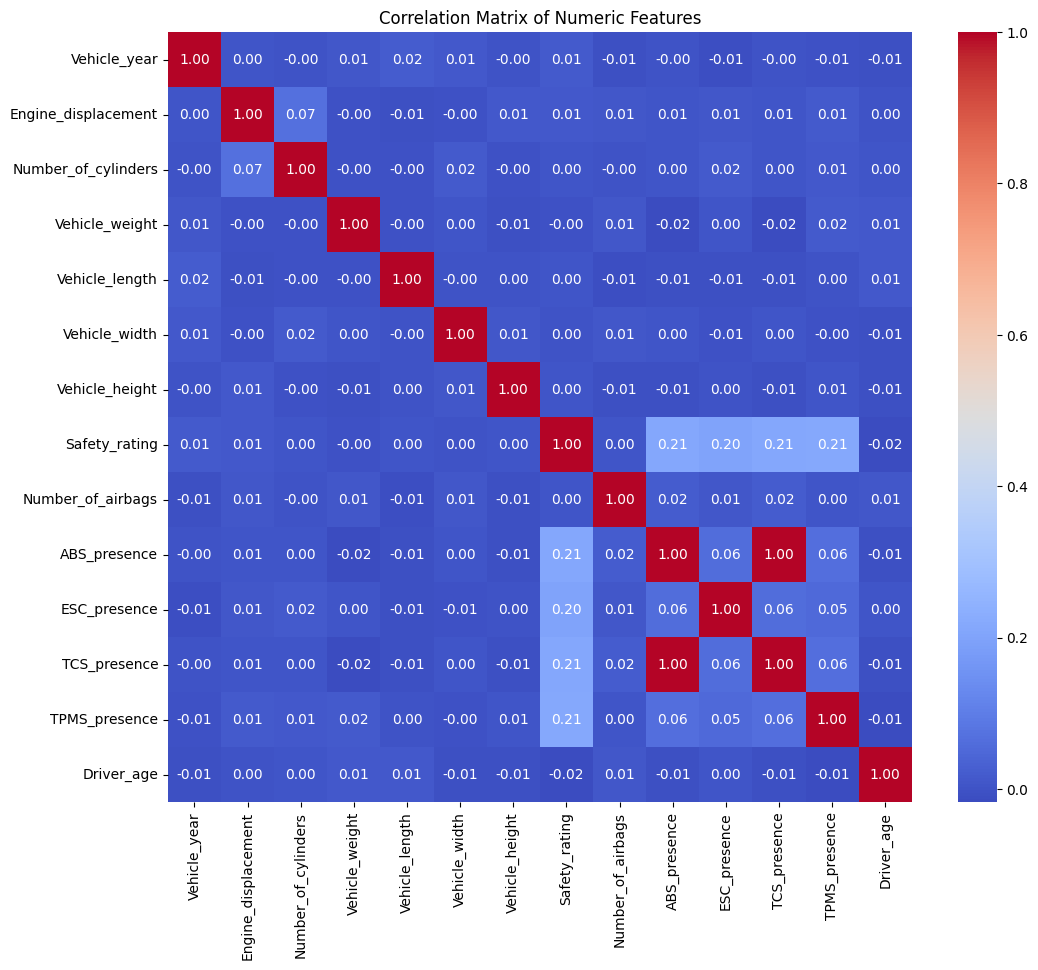

In [20]:
# Select only numeric features
numeric_features = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [21]:

# Fill binary columns (ABS, ESC, TCS, TPMS) with mode values (most common value)
for col in ['ABS_presence', 'ESC_presence', 'TCS_presence', 'TPMS_presence']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill categorical columns with mode values
for col in ['Crash_location', 'Weather_conditions', 'Road_surface_conditions', 'Day_of_week']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation

,0
Vehicle_make,0
Vehicle_type,0
Vehicle_year,0
Engine_type,0
Engine_displacement,0
Transmission_type,0
Number_of_cylinders,0
Vehicle_weight,0
Vehicle_length,0
Vehicle_width,0


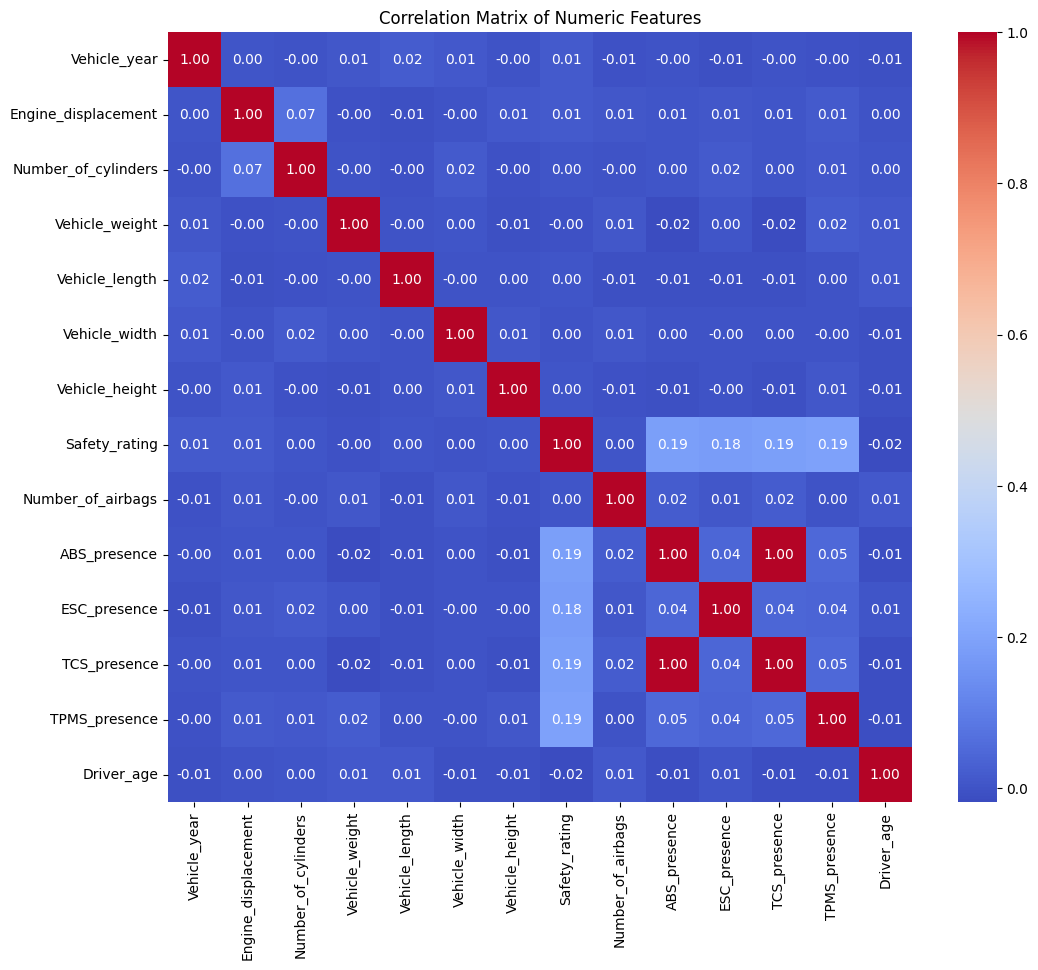

In [22]:

# Select only numeric features
numeric_features = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


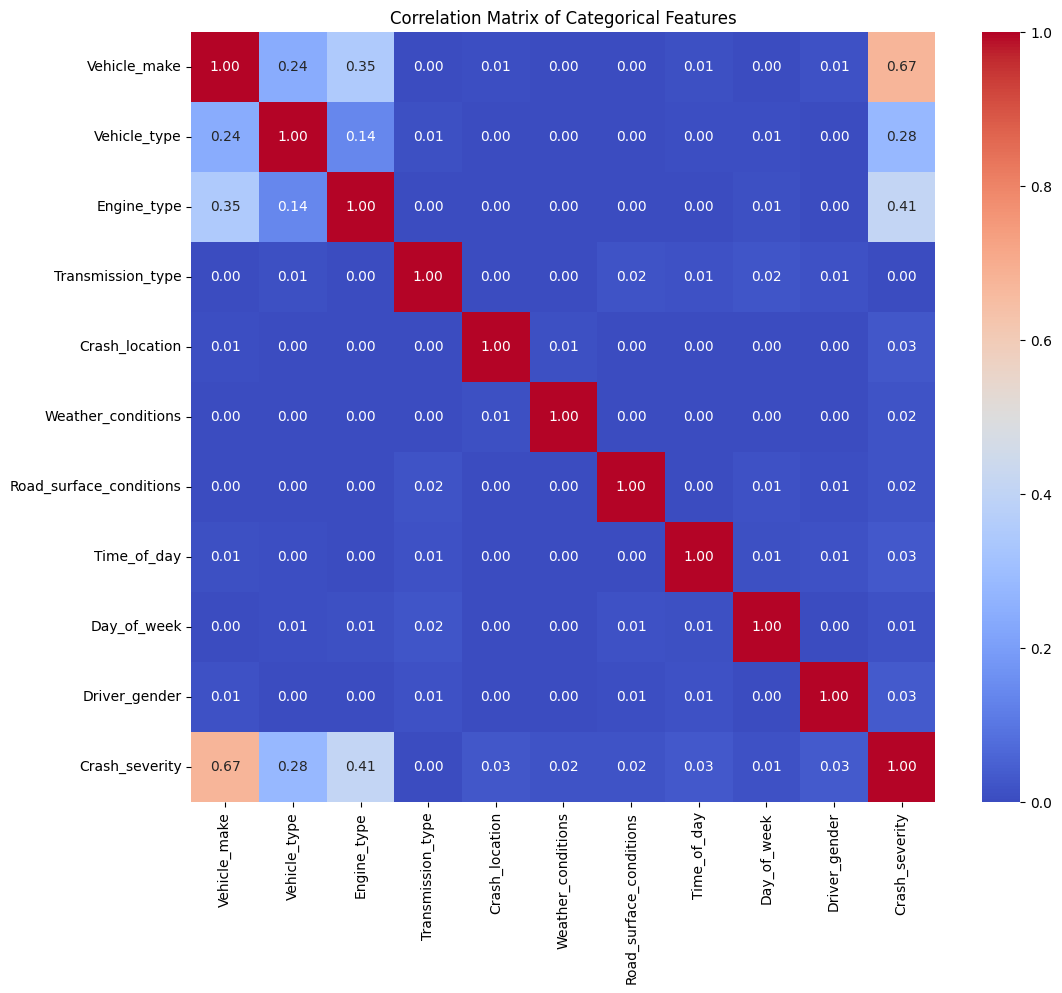

In [23]:
# Select only categorical features
categorical_features = df.select_dtypes(include=['object'])

# Calculate the Cramer's V correlation for categorical features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

import scipy.stats as ss
rows = []

for var1 in categorical_features:
  col = []
  for var2 in categorical_features:
    cramers = cramers_v(df[var1], df[var2])
    col.append(cramers)
  rows.append(col)

df_corr = pd.DataFrame(rows, columns=categorical_features.columns, index=categorical_features.columns)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Categorical Features')
plt.savefig('cramers.png')
plt.show()


In [24]:
from scipy.stats import chi2_contingency

target_variable = 'Crash_severity'

# Select only categorical features excluding the target variable
categorical_features = df.select_dtypes(include=['object']).drop(columns=[target_variable] if target_variable in df.columns else [])

# Perform Chi-Square test for each categorical feature against the target variable
for feature in categorical_features:
  contingency_table = pd.crosstab(df[feature], df[target_variable])
  chi2, p, _, _ = chi2_contingency(contingency_table)

  print(f"Chi-Square test for {feature} vs {target_variable}:")
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")

  alpha = 0.05
  if p < alpha:
    print("There is a statistically significant association between the two variables.")
  else:
    print("There is no statistically significant association between the two variables.")
  print("-------------------------------------")


Chi-Square test for Vehicle_make vs Crash_severity:
Chi-square statistic: 9090.400721507074
P-value: 0.0
There is a statistically significant association between the two variables.
-------------------------------------
Chi-Square test for Vehicle_type vs Crash_severity:
Chi-square statistic: 1580.7944733759177
P-value: 0.0
There is a statistically significant association between the two variables.
-------------------------------------
Chi-Square test for Engine_type vs Crash_severity:
Chi-square statistic: 3355.0608898616492
P-value: 0.0
There is a statistically significant association between the two variables.
-------------------------------------
Chi-Square test for Transmission_type vs Crash_severity:
Chi-square statistic: 1.4942755940877361
P-value: 0.47372049839395636
There is no statistically significant association between the two variables.
-------------------------------------
Chi-Square test for Crash_location vs Crash_severity:
Chi-square statistic: 8.601194882298117
P-valu

In [25]:
target_variable = 'Crash_severity'

# Select only numerical features
numerical_features = df.select_dtypes(include=np.number)

# Perform ANOVA test for each numerical feature against the target variable
for feature in numerical_features:
    if feature != target_variable:  # Exclude the target variable itself
        groups = [df[feature][df[target_variable] == severity] for severity in df[target_variable].unique()]
        f_statistic, p_value = ss.f_oneway(*groups)

        print(f"ANOVA test for {feature} vs {target_variable}:")
        print(f"F-statistic: {f_statistic}")
        print(f"P-value: {p_value}")

        alpha = 0.05
        if p_value < alpha:
            print("There is a statistically significant association between the two variables.")
        else:
            print("There is no statistically significant association between the two variables.")
        print("-------------------------------------")


ANOVA test for Vehicle_year vs Crash_severity:
F-statistic: 9.22677691204206
P-value: 9.92100258951535e-05
There is a statistically significant association between the two variables.
-------------------------------------
ANOVA test for Engine_displacement vs Crash_severity:
F-statistic: 11.127521205087909
P-value: 1.4885043100199024e-05
There is a statistically significant association between the two variables.
-------------------------------------
ANOVA test for Number_of_cylinders vs Crash_severity:
F-statistic: 12.475251688690324
P-value: 3.8798670036915174e-06
There is a statistically significant association between the two variables.
-------------------------------------
ANOVA test for Vehicle_weight vs Crash_severity:
F-statistic: 2.0040786896123572
P-value: 0.13483856332908528
There is no statistically significant association between the two variables.
-------------------------------------
ANOVA test for Vehicle_length vs Crash_severity:
F-statistic: 0.21212429036837543
P-value:

In [26]:
def detect_outliers_iqr(data):
  outliers = {}
  for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outliers_in_column = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column].tolist()
      outliers[column] = outliers_in_column
  return outliers


outliers_dict = detect_outliers_iqr(df.select_dtypes(include=np.number))

# Print the number of outliers in each column
for column, outlier_values in outliers_dict.items():
  print(f"Column '{column}' has {len(outlier_values)} outliers.")


Column 'Vehicle_year' has 0 outliers.
Column 'Engine_displacement' has 0 outliers.
Column 'Number_of_cylinders' has 0 outliers.
Column 'Vehicle_weight' has 0 outliers.
Column 'Vehicle_length' has 0 outliers.
Column 'Vehicle_width' has 0 outliers.
Column 'Vehicle_height' has 0 outliers.
Column 'Safety_rating' has 0 outliers.
Column 'Number_of_airbags' has 0 outliers.
Column 'ABS_presence' has 1538 outliers.
Column 'ESC_presence' has 1443 outliers.
Column 'TCS_presence' has 1538 outliers.
Column 'TPMS_presence' has 1548 outliers.
Column 'Driver_age' has 0 outliers.


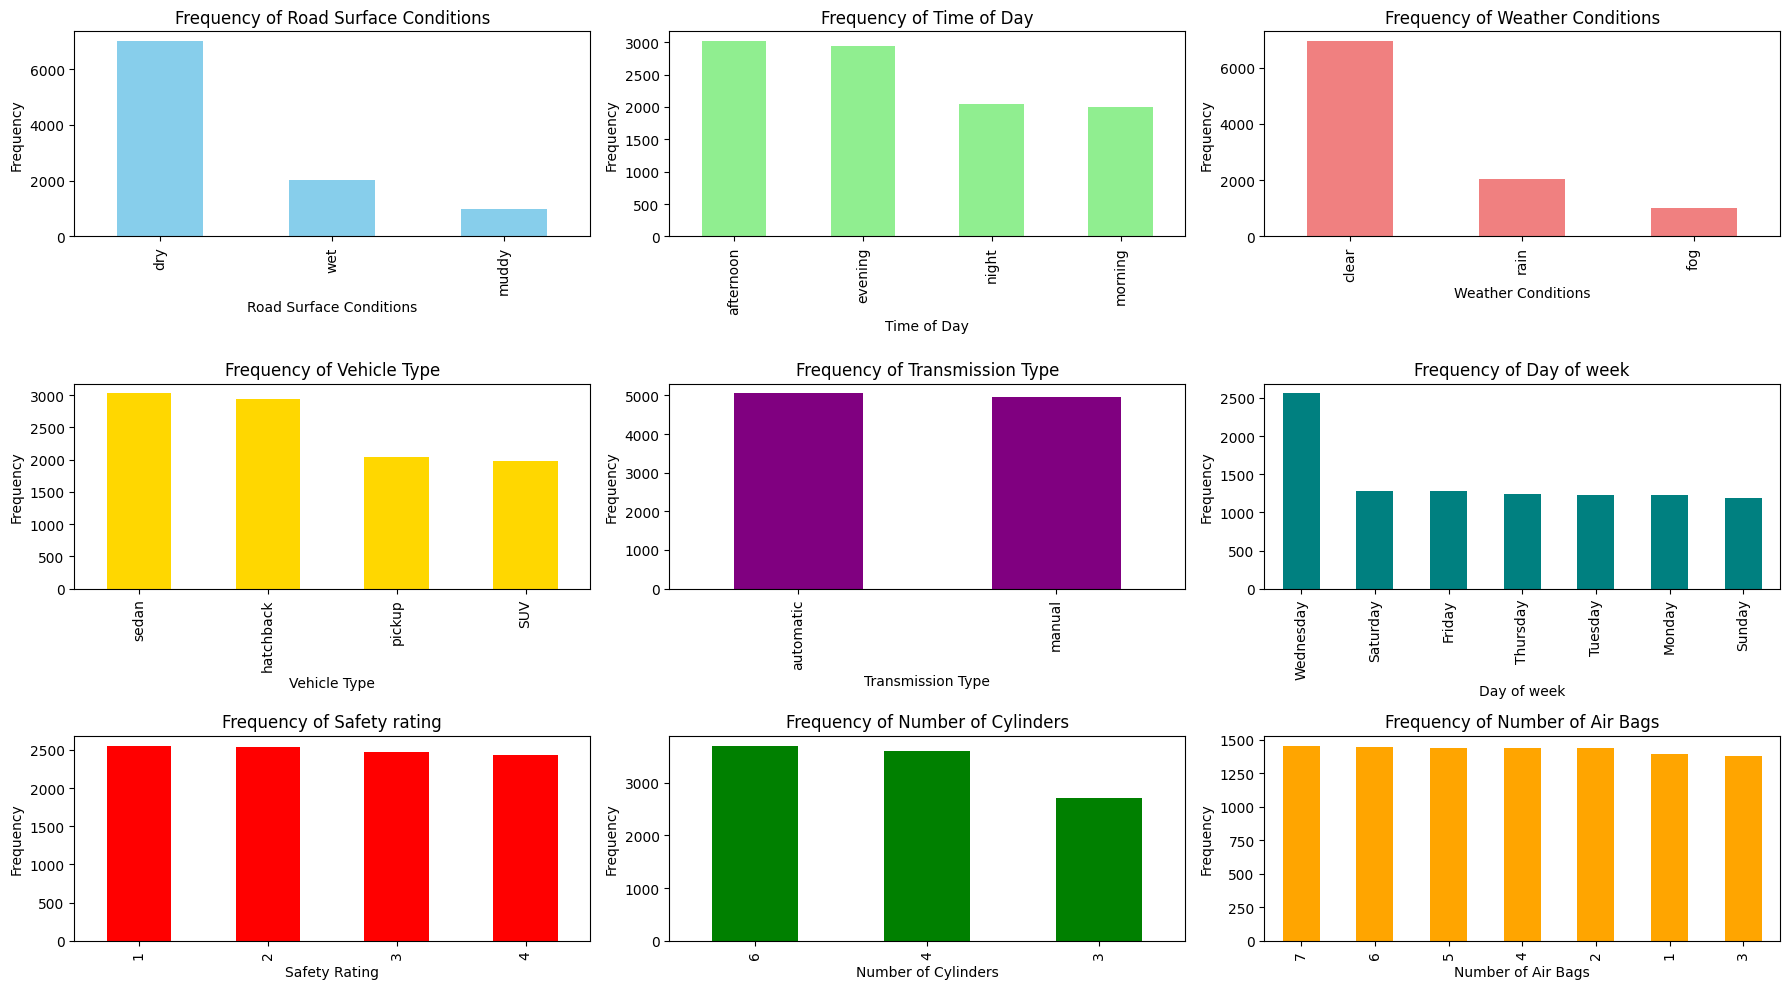

In [27]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(18, 10))  # Increased the figure size to accommodate 2 rows

df['Road_surface_conditions'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_xlabel('Road Surface Conditions')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Frequency of Road Surface Conditions')

df['Time_of_day'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_xlabel('Time of Day')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Frequency of Time of Day')

df['Weather_conditions'].value_counts().plot(kind='bar', ax=axes[0, 2], color='lightcoral')
axes[0, 2].set_xlabel('Weather Conditions')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Frequency of Weather Conditions')

df['Vehicle_type'].value_counts().plot(kind='bar', ax=axes[1, 0], color='gold')
axes[1, 0].set_xlabel('Vehicle Type')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Frequency of Vehicle Type')

df['Transmission_type'].value_counts().plot(kind='bar', ax=axes[1, 1], color='purple')
axes[1, 1].set_xlabel('Transmission Type')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Frequency of Transmission Type')

df['Day_of_week'].value_counts().plot(kind='bar', ax=axes[1, 2], color='teal')
axes[1, 2].set_xlabel('Day of week')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Frequency of Day of week')

df['Safety_rating'].value_counts().plot(kind='bar', ax=axes[2, 0], color='red')
axes[2, 0].set_xlabel('Safety Rating')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Frequency of Safety rating')

df['Number_of_cylinders'].value_counts().plot(kind='bar', ax=axes[2, 1], color='green')
axes[2, 1].set_xlabel('Number of Cylinders')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('Frequency of Number of Cylinders')

df['Number_of_airbags'].value_counts().plot(kind='bar', ax=axes[2, 2], color='orange')
axes[2, 2].set_xlabel('Number of Air Bags')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].set_title('Frequency of Number of Air Bags')

plt.tight_layout()
plt.show()

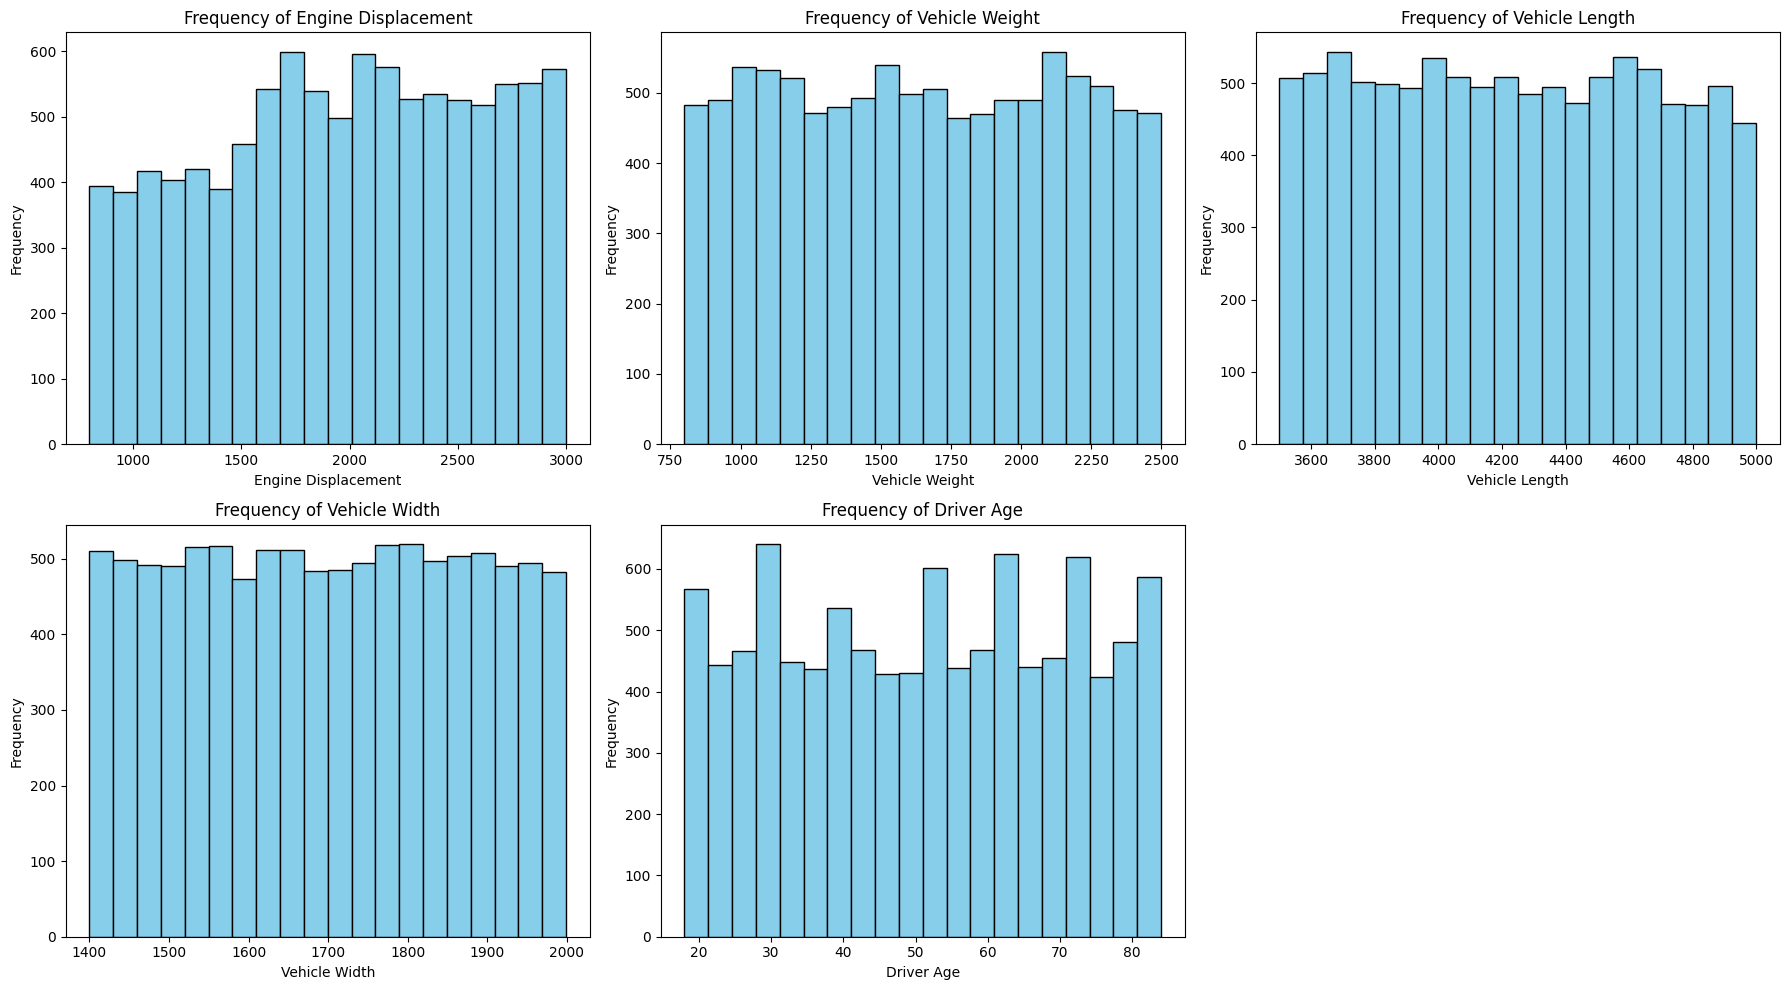

In [28]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Increased the figure size to accommodate 2 rows

df['Engine_displacement'].plot(kind='hist', ax=axes[0, 0], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Engine Displacement')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Frequency of Engine Displacement')

df['Vehicle_weight'].plot(kind='hist', ax=axes[0, 1], bins=20, color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Vehicle Weight')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Frequency of Vehicle Weight')

df['Vehicle_length'].plot(kind='hist', ax=axes[0,2], bins=20, color='skyblue', edgecolor='black')
axes[0, 2].set_xlabel('Vehicle Length')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Frequency of Vehicle Length')

df['Vehicle_width'].plot(kind='hist', ax=axes[1, 0], bins=20, color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Vehicle Width')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Frequency of Vehicle Width')

df['Driver_age'].plot(kind='hist', ax=axes[1, 1], bins=20, color='skyblue', edgecolor='black')
axes[1, 1].set_xlabel('Driver Age')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Frequency of Driver Age')

axes[1, 2].axis('off')


plt.tight_layout()
plt.show()

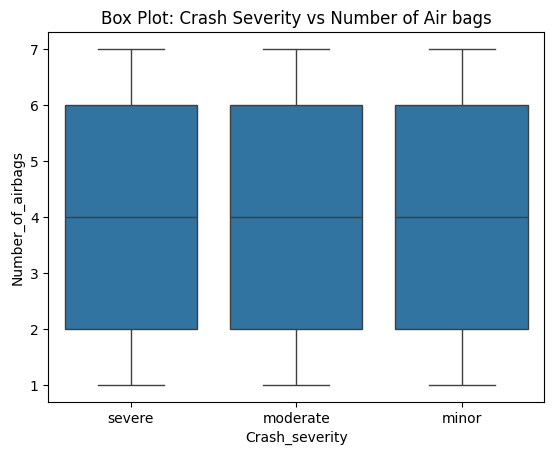

In [29]:
sns.boxplot(data=df, x='Crash_severity', y='Number_of_airbags')
plt.title('Box Plot: Crash Severity vs Number of Air bags')
plt.show()

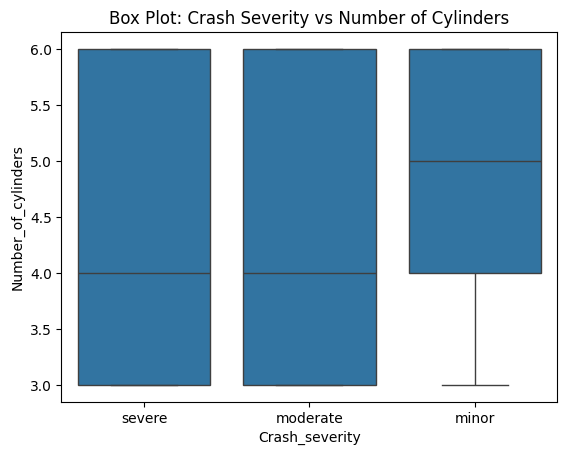

In [30]:
sns.boxplot(data=df, x='Crash_severity', y='Number_of_cylinders')
plt.title('Box Plot: Crash Severity vs Number of Cylinders')
plt.show()

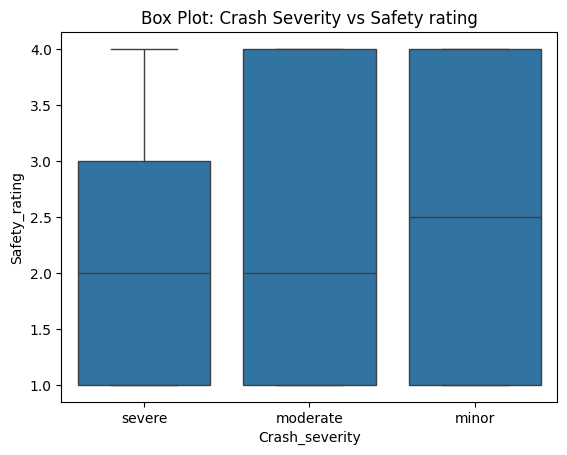

In [31]:
sns.boxplot(data=df, x='Crash_severity', y='Safety_rating')
plt.title('Box Plot: Crash Severity vs Safety rating')
plt.show()

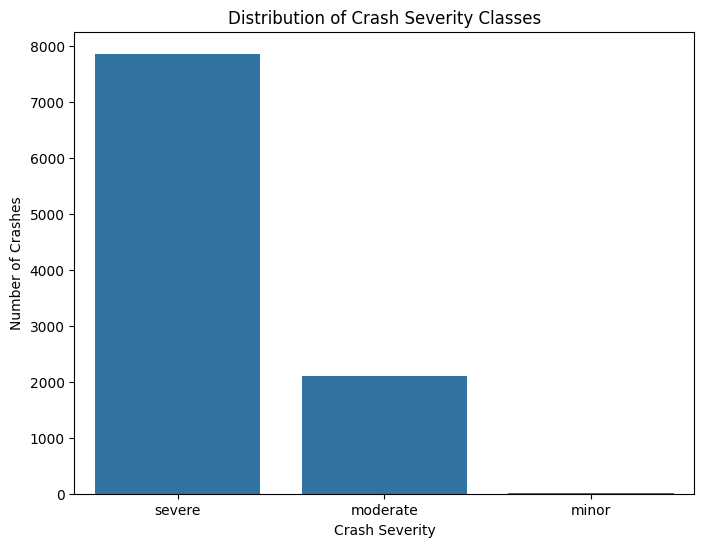

,Crash_severity
severe,7868
moderate,2112
minor,20


In [32]:
class_counts = df['Crash_severity'].value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Crash_severity', data=df)
plt.title('Distribution of Crash Severity Classes')
plt.xlabel('Crash Severity')
plt.ylabel('Number of Crashes')
plt.show()

class_counts

In [33]:
# Replacing 'Minor' with 'Moderate' in the 'Crash_severity' column
df['Crash_severity'] = df['Crash_severity'].replace('minor', 'moderate')

# Verify the changes
print(df['Crash_severity'].value_counts())

severe      7868
moderate    2132
Name: Crash_severity, dtype: int64


In [34]:
# Assuming 'df' is your DataFrame as defined in the previous code.
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Vehicle_make', 'Vehicle_type', 'Engine_type', 'Transmission_type',
       'Crash_location', 'Weather_conditions', 'Road_surface_conditions',
       'Time_of_day', 'Day_of_week', 'Driver_gender', 'Crash_severity'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through the specified columns and apply label encoding
for column in ['Vehicle_make', 'Vehicle_type', 'Driver_gender', 'Engine_type']:
    df[column] = label_encoder.fit_transform(df[column])

In [36]:

ordinal_mapping = {
    'Transmission_type': {'automatic': 1, 'manual': 0},
    'Crash_location': {'urban':1, 'rural':0},
    'Weather_conditions': {'clear': 0, 'rain': 2,'fog':1},
    'Road_surface_conditions': {'dry': 0, 'wet': 1, 'muddy':2},
    'Time_of_day': {'morning': 0, 'afternoon': 1, 'evening':2, 'night':3},
    'Day_of_week': {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6},
    'Crash_severity': {'moderate': 0, 'severe': 1}
}

# Convert ordinal categorical features to numerical using the mapping
for column, mapping in ordinal_mapping.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)
    else:
        print(f"Warning: Column '{column}' not found in DataFrame.")

In [37]:
df['Crash_severity'].value_counts()

,Crash_severity
1,7868
0,2132


In [38]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop('Crash_severity', axis=1)
y = df['Crash_severity']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Crash_severity'] = y_resampled

In [39]:
df_balanced['Crash_severity'].value_counts()

,Crash_severity
1,7868
0,7868


In [40]:
X = df_balanced.drop('Crash_severity', axis=1)  # Features (all columns except target)
y = df_balanced['Crash_severity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9822109275730623
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1509
           1       0.97      1.00      0.98      1639

    accuracy                           0.98      3148
   macro avg       0.98      0.98      0.98      3148
weighted avg       0.98      0.98      0.98      3148



In [77]:
from sklearn.metrics import log_loss

y_pred_proba = best_rf_model.predict_proba(X_test)

# Calculate log loss
logloss = log_loss(y_test, y_pred_proba)

print(f"Log Loss: {logloss}")

Log Loss: 0.08963882598799594


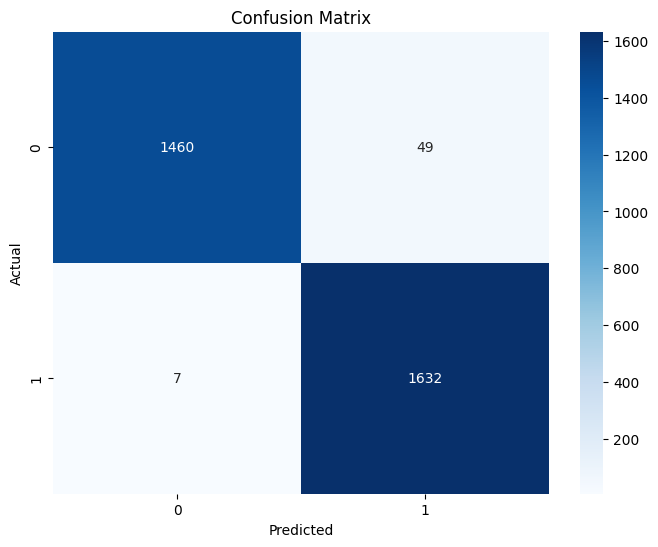

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

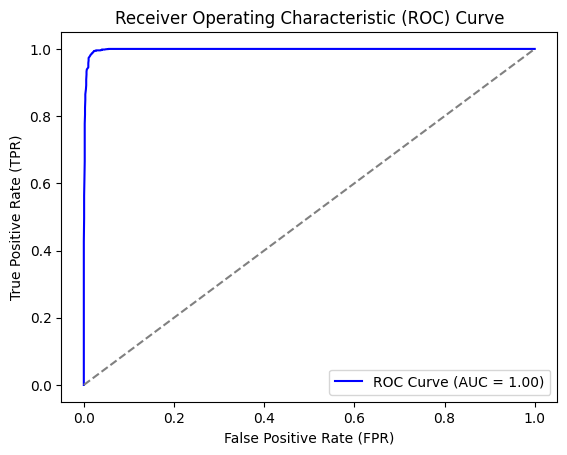

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]  # Probability for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



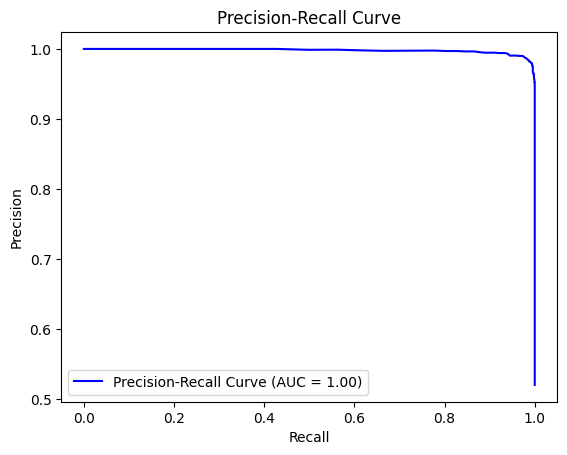

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
auc_pr = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Logistic Regression Accuracy: 0.8459339263024143
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1509
           1       0.90      0.79      0.84      1639

    accuracy                           0.85      3148
   macro avg       0.85      0.85      0.85      3148
weighted avg       0.85      0.85      0.85      3148



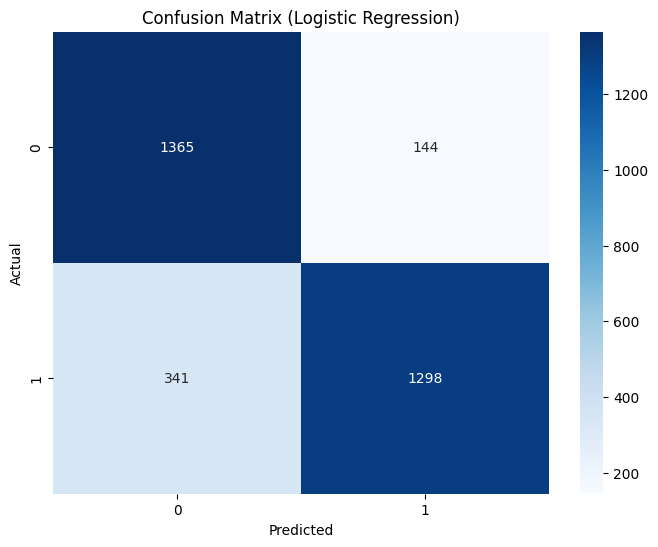

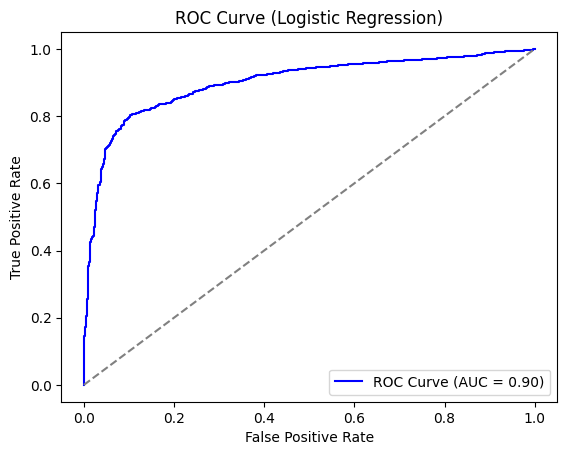

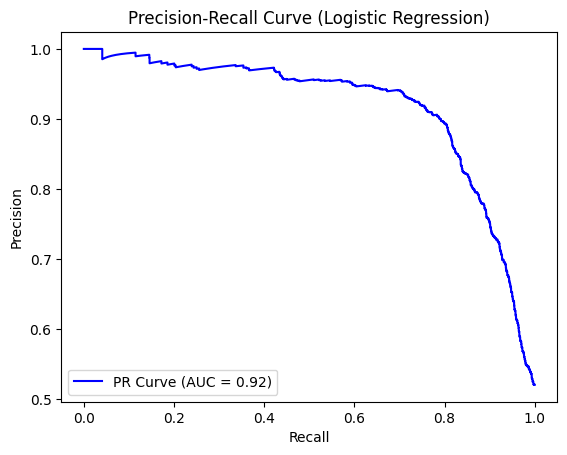

In [45]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

# ROC Curve and AUC
y_pred_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_prob_logreg)
auc_score_logreg = roc_auc_score(y_test, y_pred_prob_logreg)

plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'ROC Curve (AUC = {auc_score_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve and AUC
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, y_pred_prob_logreg)
auc_pr_logreg = auc(recall_logreg, precision_logreg)

plt.figure()
plt.plot(recall_logreg, precision_logreg, color='blue', label=f'PR Curve (AUC = {auc_pr_logreg:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.legend(loc='lower left')
plt.show()

In [46]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred_prob_logreg)
print(f"Log Loss for Logistic Regression: {logloss}")

Log Loss for Logistic Regression: 0.3944712813279346


SVM Accuracy: 0.7175984752223634
              precision    recall  f1-score   support

           0       0.89      0.47      0.61      1509
           1       0.66      0.95      0.78      1639

    accuracy                           0.72      3148
   macro avg       0.78      0.71      0.70      3148
weighted avg       0.77      0.72      0.70      3148



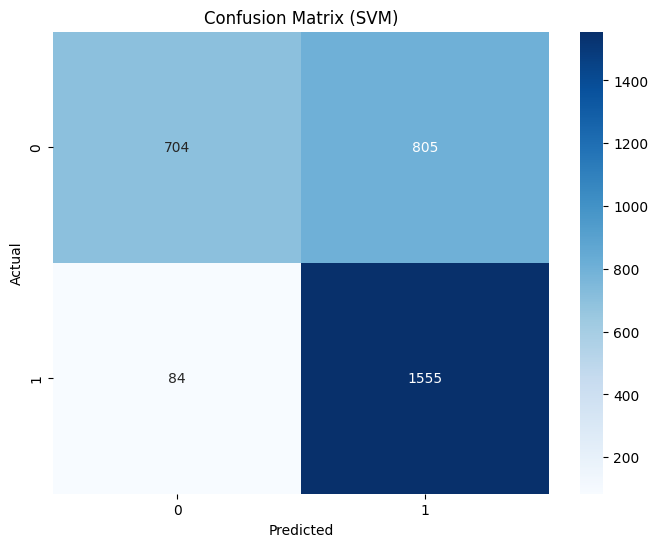

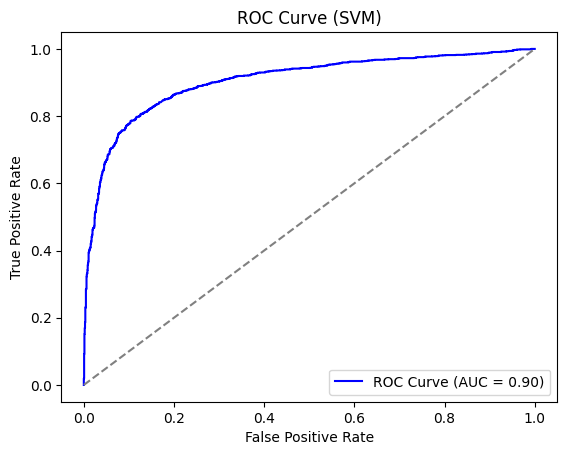

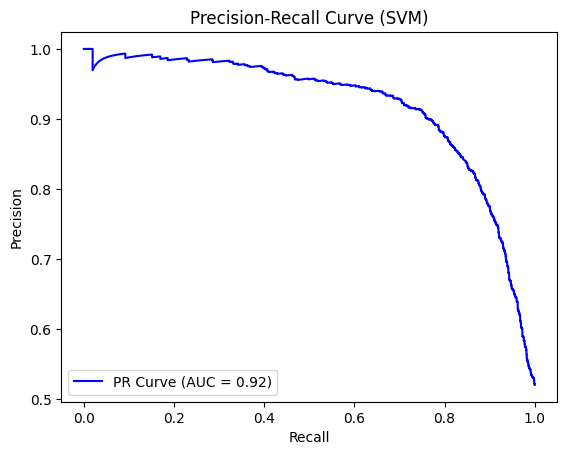

In [47]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # You can change the kernel if needed

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()

# ROC Curve and AUC
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
auc_score_svm = roc_auc_score(y_test, y_pred_prob_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_score_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve and AUC
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_pred_prob_svm)
auc_pr_svm = auc(recall_svm, precision_svm)

plt.figure()
plt.plot(recall_svm, precision_svm, color='blue', label=f'PR Curve (AUC = {auc_pr_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend(loc='lower left')
plt.show()

In [48]:
logloss_svm = log_loss(y_test, y_pred_prob_svm)
print(f"Log Loss for SVM: {logloss_svm}")

Log Loss for SVM: 0.40302237493851994


In [49]:
import copy

def PI_calculate(model, data, criterion):
    PI_matrix = []
    original_pred = model.predict(data[0])
    original_error = criterion(data[1],original_pred)
    for feature in range(data[0].shape[1]):
        perbutated_data= copy.deepcopy(data[0])
        # Convert the Series to a NumPy array before shuffling
        values_to_shuffle = perbutated_data.iloc[:, feature].to_numpy()
        np.random.shuffle(values_to_shuffle)
        # Assign the shuffled values back to the DataFrame
        perbutated_data.iloc[:, feature] = values_to_shuffle
        perbutated_pred = model.predict(perbutated_data)
        perbutated_error = criterion(data[1], perbutated_pred)
        PI_matrix.append((original_error - perbutated_error))
    return pd.DataFrame(PI_matrix, index=data[0].columns, columns=['Features']).transpose()

In [50]:
from sklearn.metrics import accuracy_score
PI_rf = PI_calculate(best_rf_model,[X_test,y_test],accuracy_score)
PI_lr = PI_calculate(logreg_model,[X_test,y_test],accuracy_score)
PI_svm = PI_calculate(svm_model,[X_test,y_test],accuracy_score)


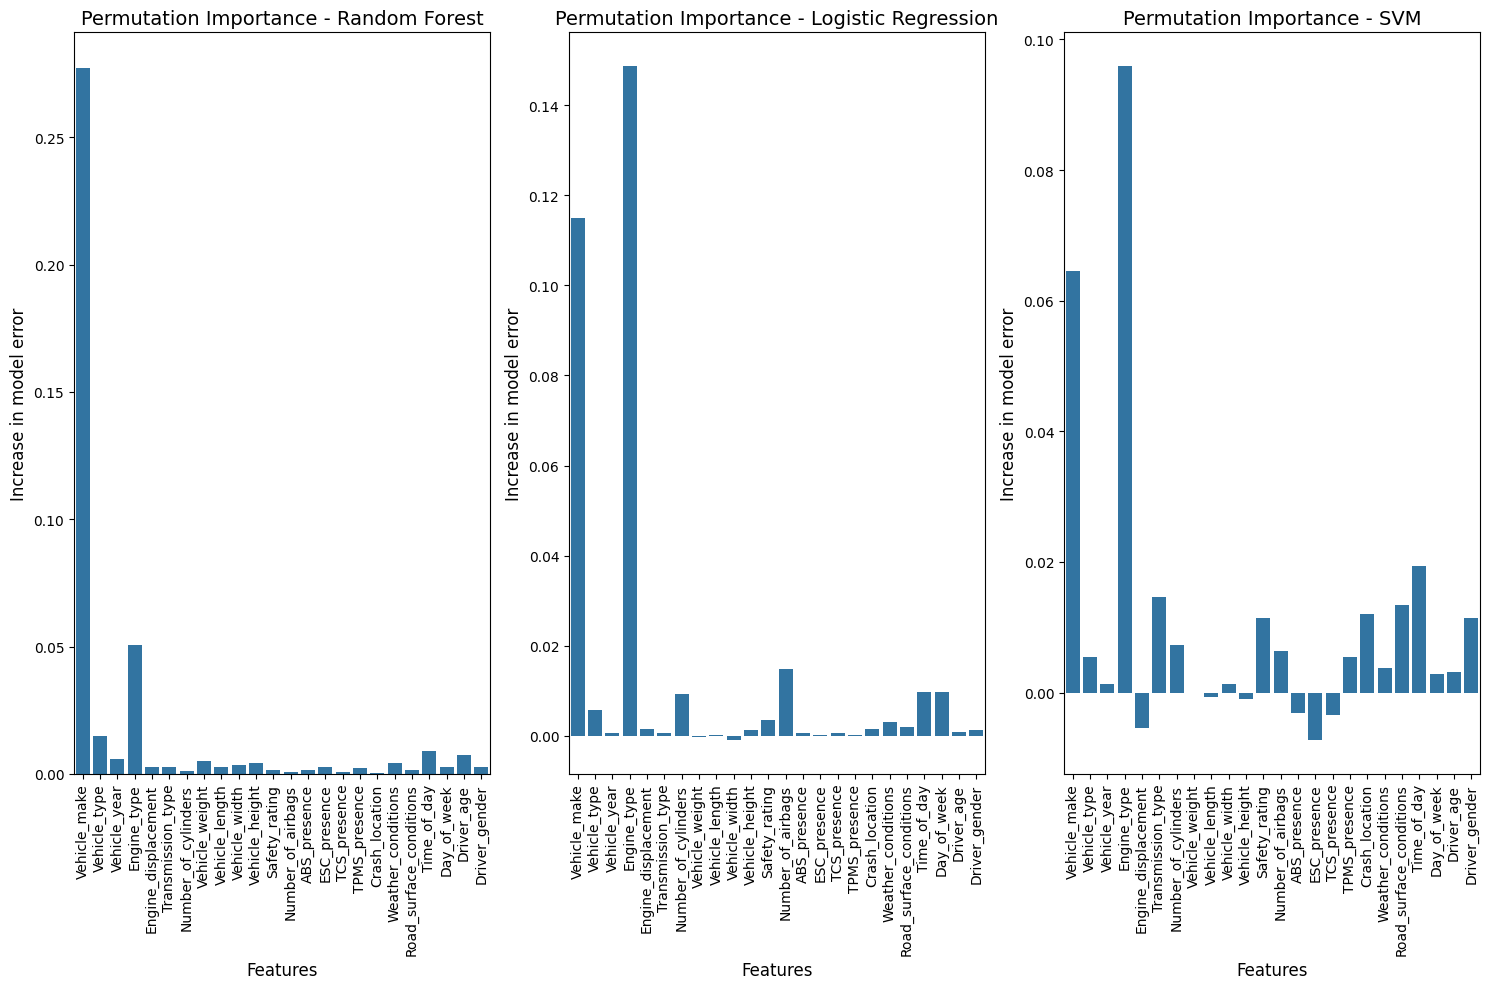

In [80]:
models = [PI_rf, PI_lr, PI_svm]
model_names = ['Random Forest', 'Logistic Regression', 'SVM']

fig, axes = plt.subplots(1,3, figsize=(15, 10))
axes = axes.ravel()  # Flatten the axes array for easy iteration

for i, (model_data, model_name) in enumerate(zip(models, model_names)):
    p = sns.barplot(x=model_data.columns, y=model_data.values.flatten(), ax=axes[i])
    p.set_xlabel("Features", fontsize=12)
    p.set_ylabel("Increase in model error", fontsize=12)
    p.set_xticklabels(p.get_xticklabels(), rotation=90)
    p.set_title(f'Permutation Importance - {model_name}', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [52]:
import dice_ml
from dice_ml.utils import helpers

In [53]:
def manhattan_distance(counterfactual, reference):
  return np.sum(np.abs(counterfactual - reference))

def cosine_distance(counterfactual, reference):
  return 1 - cosine_similarity(counterfactual.reshape(1, -1), reference.reshape(1, -1))[0][0]

def euclidean_distance(counterfactual, reference):
  return np.linalg.norm(counterfactual - reference)

In [54]:
def compute_recourse_values(original_instance_df, counterfactuals_df, epsilon=1e-4):
    if len(original_instance_df) != 1:
        raise ValueError("original_instance_df should contain exactly one row.")

    # Extract the original instance as a dictionary
    original_instance = original_instance_df.iloc[0].to_dict()

    recourse_results = []

    for index, counterfactual in counterfactuals_df.iterrows():
        counterfactual_instance = counterfactual.to_dict()
        count = 0
        delta_values = {}

        # Compute deltas for each feature
        for feature in original_instance:
            delta = abs(original_instance[feature] - counterfactual_instance[feature])
            if delta > epsilon:
                count += 1
                delta_values[feature] = delta

        # Store the results for this counterfactual
        recourse_results.append({
            'Counterfactual Index': index,
            'CScore': count,
            'Delta Values': delta_values
        })

    return recourse_results

In [55]:
from sklearn.neighbors import KDTree

def compute_nscore(original_instance_df, counterfactuals_df, radius_range):
    # Ensure the original instance is a single-row DataFrame
    if len(original_instance_df) != 1:
        raise ValueError("original_instance_df should contain exactly one row.")

    # Convert original instance and counterfactuals to numpy arrays
    original_instance = original_instance_df.values[0].reshape(1, -1)
    counterfactuals = counterfactuals_df.values

    # Create a k-d tree using the counterfactuals and original instance
    combined_data = np.vstack([original_instance, counterfactuals])
    kd_tree = KDTree(combined_data)

    # Initialize results
    nscore_results = {}

    for radius in radius_range:
        # Query neighbors for the original instance within the given radius
        neighbors_indices = kd_tree.query_radius(original_instance, r=radius)[0]

        for i, counterfactual in enumerate(counterfactuals):
            # Check if the counterfactual index is a neighbor of the original instance
            if i + 1 in neighbors_indices:  # Counterfactual indices are offset by 1
                nscore_results[i] = 1
            else:
                nscore_results[i] = 0

        # If we already find neighbors, we can stop further radius checks
        if 1 in nscore_results.values():
            break

    return nscore_results

# Radius range to check
radius_range = [0.1, 0.2, 0.5]

In [56]:
# Define the permitted range for specific features
permitted_range = {
    'Driver_age': [12, 100],
    'Number_of_airbags': [0, 10],
    'Vehicle_weight': [700, 3000],
    'Vehicle_length': [3000, 6000],
    'Vehicle_width': [1500,2500],
    'Engine_displacement': [800, 8000],
    'Number_of_cylinders':[3,16],
    'Safety_rating': [1, 5]
}

In [57]:
# Features to vary in counterfactual explanations
features_to_vary = ['Engine_displacement', 'Vehicle_weight', 'Vehicle_length', 'Vehicle_width',
                     'Number_of_airbags', 'Number_of_cylinders', 'Safety_rating',
                    'Transmission_type', 'Crash_location',
                    'Road_surface_conditions',
                    'Engine_type']

In [90]:
# Create a DICE explainer object
data_dice = dice_ml.Data(dataframe=df_balanced, continuous_features=['Engine_displacement', 'Vehicle_weight', 'Vehicle_length', 'Vehicle_width', 'Driver_age', 'Number_of_airbags', 'Number_of_cylinders','Safety_rating'], outcome_name='Crash_severity')
model_dice = dice_ml.Model(model=best_rf_model, backend="sklearn")
explainer = dice_ml.Dice(data_dice, model_dice, method="random")

# Generate counterfactual explanations for a specific instance
query_instance = X_test.iloc[[0]] # Example: Use the first instance in your test set
cf_explanation_rf = explainer.generate_counterfactuals(query_instance,
                                                    total_CFs=3,
                                                    desired_class="opposite",
                                                    proximity_weight=1,
                                                    diversity_weight=1,
                                                    permitted_range=permitted_range,
                                                    features_to_vary=features_to_vary
                                                    )

# Visualize the counterfactuals
cf_explanation_rf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

Query instance (original outcome : 0)


,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,...,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,2,0,2021,2,1722,0,3,2320,4124,1620,...,1.0,1.0,1,0,0,0,1,67,0,0



Diverse Counterfactual set (new outcome: 1)


,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,...,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,-,-,-,-,-,-,9.0,1170.0,-,-,...,-,-,-,-,-,-,-,-,-,1.0
1,-,-,-,-,-,-,15.0,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
2,-,-,-,0.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0


In [91]:
# Access the counterfactual examples from the cf_explanation object
counterfactuals = cf_explanation_rf.cf_examples_list[0].final_cfs_df
counterfactuals = counterfactuals.drop('Crash_severity', axis=1)

# Iterate through the counterfactuals and calculate the Manhattan distance
for i in range(len(counterfactuals)):
    cf = counterfactuals.iloc[[i]]
    distance1 = manhattan_distance(cf.values[0], query_instance.values[0])
    distance2 = cosine_distance(cf.values[0], query_instance.values[0])
    distance3 = euclidean_distance(cf.values[0], query_instance.values[0])
    print(f"Manhattan distance for counterfactual {i+1}: {distance1}")
    print(f"Cosine distance for counterfactual {i+1}: {distance2}")
    print(f"Euclidean distance for counterfactual {i+1}: {distance3}")

Manhattan distance for counterfactual 1: 1156.0
Cosine distance for counterfactual 1: 0.01819265309711282
Euclidean distance for counterfactual 1: 1150.0156520673968
Manhattan distance for counterfactual 2: 14.0
Cosine distance for counterfactual 2: 2.1103679557210597e-06
Euclidean distance for counterfactual 2: 12.165525060596439
Manhattan distance for counterfactual 3: 3.0
Cosine distance for counterfactual 3: 7.129655166249194e-08
Euclidean distance for counterfactual 3: 2.23606797749979


In [93]:
recourse_results = compute_recourse_values(query_instance, counterfactuals)
for result in recourse_results:
    print(f"Counterfactual {result['Counterfactual Index']} - CScore: {result['CScore']}, Delta Values: {result['Delta Values']}")

Counterfactual 0 - CScore: 2, Delta Values: {'Number_of_cylinders': 6.0, 'Vehicle_weight': 1150.0}
Counterfactual 1 - CScore: 2, Delta Values: {'Number_of_cylinders': 12.0, 'Number_of_airbags': 2.0}
Counterfactual 2 - CScore: 2, Delta Values: {'Engine_type': 2.0, 'Safety_rating': 1.0}


In [94]:
nscore_results = compute_nscore(query_instance, counterfactuals, radius_range)
for counterfactual_idx, nscore in nscore_results.items():
    print(f"Counterfactual {counterfactual_idx} - NScore: {nscore}")

Counterfactual 0 - NScore: 0
Counterfactual 1 - NScore: 0
Counterfactual 2 - NScore: 0


In [63]:
# Create a DICE explainer object for Logistic Regression
model_dice = dice_ml.Model(model=logreg_model, backend="sklearn")
explainer = dice_ml.Dice(data_dice, model_dice, method="random")

In [64]:
cf_explanation_lg = explainer.generate_counterfactuals(query_instance,
                total_CFs=3, desired_class="opposite",
                proximity_weight=0.5, diversity_weight=0.5,features_to_vary=features_to_vary, permitted_range=permitted_range)
cf_explanation_lg.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

Query instance (original outcome : 1)


,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,...,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,2,0,2021,2,1722,0,3,2320,4124,1620,...,1.0,1.0,1,0,0,0,1,67,0,1



Diverse Counterfactual set (new outcome: 0)


,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,...,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,-,-,-,3.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
1,-,-,-,-,-,-,-,881.0,-,-,...,-,-,0.0,-,-,-,-,-,-,0.0
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0


In [65]:
# Access the counterfactual examples from the cf_explanation object
counterfactuals_lg = cf_explanation_lg.cf_examples_list[0].final_cfs_df
counterfactuals_lg = counterfactuals_lg.drop('Crash_severity', axis=1)

# Iterate through the counterfactuals and calculate the Manhattan distance
for i in range(len(counterfactuals_lg)):
    cf = counterfactuals_lg.iloc[[i]]
    distance1 = manhattan_distance(cf.values[0], query_instance.values[0])
    distance2 = cosine_distance(cf.values[0], query_instance.values[0])
    distance3 = euclidean_distance(cf.values[0], query_instance.values[0])
    print(f"Manhattan distance for counterfactual {i+1}: {distance1}")
    print(f"Cosine distance for counterfactual {i+1}: {distance2}")
    print(f"Euclidean distance for counterfactual {i+1}: {distance3}")

Manhattan distance for counterfactual 1: 695.0
Cosine distance for counterfactual 1: 0.004167157826240664
Euclidean distance for counterfactual 1: 694.0007204607211
Manhattan distance for counterfactual 2: 1440.0
Cosine distance for counterfactual 2: 0.029200994503536193
Euclidean distance for counterfactual 2: 1439.0003474634743
Manhattan distance for counterfactual 3: 128.0
Cosine distance for counterfactual 3: 0.00018848035590746104
Euclidean distance for counterfactual 3: 126.01587201618692


In [66]:
recourse_results = compute_recourse_values(query_instance, counterfactuals_lg)
for result in recourse_results:
    print(f"Counterfactual {result['Counterfactual Index']} - CScore: {result['CScore']}, Delta Values: {result['Delta Values']}")

Counterfactual 0 - CScore: 2, Delta Values: {'Engine_type': 1.0, 'Vehicle_length': 694.0}
Counterfactual 1 - CScore: 2, Delta Values: {'Vehicle_weight': 1439.0, 'Crash_location': 1.0}
Counterfactual 2 - CScore: 2, Delta Values: {'Vehicle_weight': 126.0, 'Safety_rating': 2.0}


In [67]:
nscore_results = compute_nscore(query_instance, counterfactuals_lg, radius_range)
for counterfactual_idx, nscore in nscore_results.items():
    print(f"Counterfactual {counterfactual_idx} - NScore: {nscore}")

Counterfactual 0 - NScore: 0
Counterfactual 1 - NScore: 0
Counterfactual 2 - NScore: 0


In [68]:
# Create a DICE explainer object for SVM Model
model_dice = dice_ml.Model(model=svm_model, backend="sklearn")
explainer = dice_ml.Dice(data_dice, model_dice, method="random")


In [69]:
cf_explanation_svm = explainer.generate_counterfactuals(query_instance,
                total_CFs=4, desired_class="opposite",
                proximity_weight=1.5, diversity_weight=1.0,features_to_vary=features_to_vary, permitted_range=permitted_range)
cf_explanation_svm.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

Query instance (original outcome : 0)


,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,...,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,2,0,2021,2,1722,0,3,2320,4124,1620,...,1.0,1.0,1,0,0,0,1,67,0,0



Diverse Counterfactual set (new outcome: 1)


,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,...,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,-,-,-,-,2950.0,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
1,-,-,-,-,-,-,-,-,-,2109.0,...,-,-,-,-,2.0,-,-,-,-,1.0
2,-,-,-,-,-,-,-,-,-,2430.0,...,-,-,-,-,-,-,-,-,-,1.0
3,-,-,-,-,5104.0,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0


In [70]:
# Access the counterfactual examples from the cf_explanation object
counterfactuals_svm = cf_explanation_svm.cf_examples_list[0].final_cfs_df
counterfactuals_svm = counterfactuals_svm.drop('Crash_severity', axis=1)

# Iterate through the counterfactuals and calculate the Manhattan distance
for i in range(len(counterfactuals_svm)):
    cf = counterfactuals_svm.iloc[[i]]
    distance1 = manhattan_distance(cf.values[0], query_instance.values[0])
    distance2 = cosine_distance(cf.values[0], query_instance.values[0])
    distance3 = euclidean_distance(cf.values[0], query_instance.values[0])
    print(f"Manhattan distance for counterfactual {i+1}: {distance1}")
    print(f"Cosine distance for counterfactual {i+1}: {distance2}")
    print(f"Euclidean distance for counterfactual {i+1}: {distance3}")

Manhattan distance for counterfactual 1: 1538.0
Cosine distance for counterfactual 1: 0.016954120190741606
Euclidean distance for counterfactual 1: 1266.5243779730415
Manhattan distance for counterfactual 2: 491.0
Cosine distance for counterfactual 2: 0.003003132368133654
Euclidean distance for counterfactual 2: 489.004089962446
Manhattan distance for counterfactual 3: 1347.0
Cosine distance for counterfactual 3: 0.013150822439720433
Euclidean distance for counterfactual 3: 971.8379494545374
Manhattan distance for counterfactual 4: 3382.0
Cosine distance for counterfactual 4: 0.09449572245306403
Euclidean distance for counterfactual 4: 3382.0


In [71]:
recourse_results = compute_recourse_values(query_instance, counterfactuals_svm)
for result in recourse_results:
    print(f"Counterfactual {result['Counterfactual Index']} - CScore: {result['CScore']}, Delta Values: {result['Delta Values']}")

Counterfactual 0 - CScore: 2, Delta Values: {'Engine_displacement': 1228.0, 'Vehicle_width': 310.0}
Counterfactual 1 - CScore: 2, Delta Values: {'Vehicle_width': 489.0, 'Road_surface_conditions': 2.0}
Counterfactual 2 - CScore: 2, Delta Values: {'Vehicle_weight': 537.0, 'Vehicle_width': 810.0}
Counterfactual 3 - CScore: 1, Delta Values: {'Engine_displacement': 3382.0}


In [72]:
nscore_results = compute_nscore(query_instance, counterfactuals_svm, radius_range)
for counterfactual_idx, nscore in nscore_results.items():
    print(f"Counterfactual {counterfactual_idx} - NScore: {nscore}")

Counterfactual 0 - NScore: 0
Counterfactual 1 - NScore: 0
Counterfactual 2 - NScore: 0
Counterfactual 3 - NScore: 0


In [73]:
def calculate_average_distances(counterfactuals, query_instance, distance_functions):
    average_distances = {}
    for name, func in distance_functions.items():
        distances = []
        for i in range(len(counterfactuals)):
            cf = counterfactuals.iloc[[i]]
            distance = func(cf.values[0], query_instance.values[0])
            distances.append(distance)
        average_distances[name] = np.mean(distances)
    return average_distances

# Define the distance functions
distance_functions = {
    "Manhattan": manhattan_distance,
    "Cosine": cosine_distance,
    "Euclidean": euclidean_distance
}

# Calculate average distances for each model
avg_distances_rf = calculate_average_distances(counterfactuals, query_instance, distance_functions)
avg_distances_lr = calculate_average_distances(counterfactuals_lg, query_instance, distance_functions)
avg_distances_svm = calculate_average_distances(counterfactuals_svm, query_instance, distance_functions)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Manhattan': [avg_distances_rf['Manhattan'], avg_distances_lr['Manhattan'], avg_distances_svm['Manhattan']],
    'Cosine': [avg_distances_rf['Cosine'], avg_distances_lr['Cosine'], avg_distances_svm['Cosine']],
    'Euclidean': [avg_distances_rf['Euclidean'], avg_distances_lr['Euclidean'], avg_distances_svm['Euclidean']]
})

comparison_df

,Model,Manhattan,Cosine,Euclidean
0,Random Forest,114.666667,0.000453,112.475918
1,Logistic Regression,754.333333,0.011186,753.005647
2,SVM,1689.500000,0.031901,1527.341604


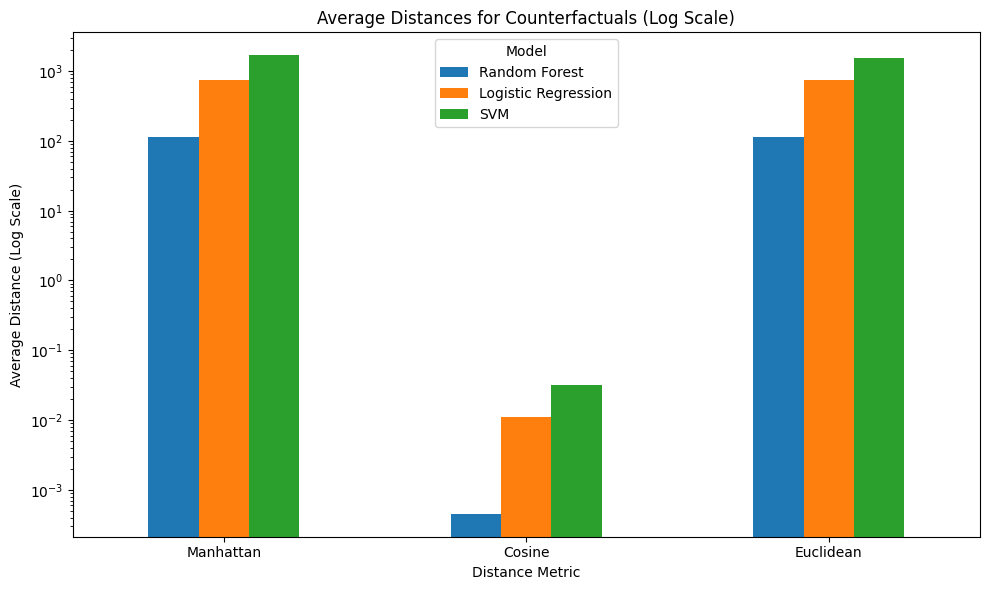

In [96]:
import matplotlib.pyplot as plt

# Transpose the DataFrame for better visualization
comparison_df_transposed = comparison_df.set_index('Model').transpose()

# Create the bar plot with log scale for y-axis
comparison_df_transposed.plot(kind='bar', logy=True, figsize=(10, 6))
plt.title('Average Distances for Counterfactuals (Log Scale)')
plt.xlabel('Distance Metric')
plt.ylabel('Average Distance (Log Scale)')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [75]:
# Transpose the query instance DataFrame
query_instance_transposed = query_instance.transpose()

# Print the transposed query instance
print("Transposed Query Instance:")
print(query_instance_transposed)

Transposed Query Instance:
                               10870
Vehicle_make                2.000000
Vehicle_type                0.000000
Vehicle_year             2021.000000
Engine_type                 2.000000
Engine_displacement      1722.000000
Transmission_type           0.000000
Number_of_cylinders         3.000000
Vehicle_weight           2320.000000
Vehicle_length           4124.000000
Vehicle_width            1620.000000
Vehicle_height           1731.000000
Safety_rating               3.000000
Number_of_airbags           5.000000
ABS_presence                1.000000
ESC_presence                0.783502
TCS_presence                1.000000
TPMS_presence               1.000000
Crash_location              1.000000
Weather_conditions          0.000000
Road_surface_conditions     0.000000
Time_of_day                 0.000000
Day_of_week                 1.000000
Driver_age                 67.000000
Driver_gender               0.000000


In [98]:
# Transpose the query instance DataFrame
query_instance_transposed = query_instance.transpose()

# Print the transposed query instance
print("Transposed Query Instance:")
print(query_instance_transposed)

Transposed Query Instance:
                               10870
Vehicle_make                2.000000
Vehicle_type                0.000000
Vehicle_year             2021.000000
Engine_type                 2.000000
Engine_displacement      1722.000000
Transmission_type           0.000000
Number_of_cylinders         3.000000
Vehicle_weight           2320.000000
Vehicle_length           4124.000000
Vehicle_width            1620.000000
Vehicle_height           1731.000000
Safety_rating               3.000000
Number_of_airbags           5.000000
ABS_presence                1.000000
ESC_presence                0.783502
TCS_presence                1.000000
TPMS_presence               1.000000
Crash_location              1.000000
Weather_conditions          0.000000
Road_surface_conditions     0.000000
Time_of_day                 0.000000
Day_of_week                 1.000000
Driver_age                 67.000000
Driver_gender               0.000000


In [100]:
# prompt: # Transpose the query instance DataFrame
# query_instance_transposed = query_instance.transpose()
# # Print the transposed query instance
# print("Transposed Query Instance:")
# print(query_instance_transposed)
# similarly transpose first counterfactual

# Transpose the first counterfactual DataFrame
first_counterfactual_transposed = counterfactuals.iloc[[0]].transpose()

# Print the transposed first counterfactual
print("\nTransposed First Counterfactual:")
first_counterfactual_transposed


Transposed First Counterfactual:


,0
Vehicle_make,2.000000
Vehicle_type,0.000000
Vehicle_year,2021.000000
Engine_type,2.000000
Engine_displacement,1722.000000
Transmission_type,0.000000
Number_of_cylinders,9.000000
Vehicle_weight,1170.000000
Vehicle_length,4124.000000
Vehicle_width,1620.000000


In [82]:
def calculate_loss(query_instance, counterfactuals):
    """Calculates proximity, sparsity, and prediction losses."""

    # Step 1: Calculate Proximity Loss (L2 Norm for numerical features)
    numerical_features = query_instance.columns
    proximity_loss = np.linalg.norm(query_instance[numerical_features].values -
                                    counterfactuals[numerical_features].values, ord=2)

    # Step 2: Calculate Sparsity Loss (Count of features modified)
    sparsity_loss = (query_instance.values != counterfactuals.values).sum()


    # Step 4: Combine Losses (you might want to weight these differently)
    total_loss = proximity_loss + sparsity_loss

    return proximity_loss, sparsity_loss, total_loss

# Calculate losses for each model
proximity_rf, sparsity_rf, total_loss_rf = calculate_loss(query_instance, counterfactuals)
proximity_lr, sparsity_lr, total_loss_lr = calculate_loss(query_instance, counterfactuals_lg)
proximity_svm, sparsity_svm, total_loss_svm = calculate_loss(query_instance, counterfactuals_svm)

# Print or store the results
print("Random Forest Losses:")
print(f"Proximity Loss: {proximity_rf}")
print(f"Sparsity Loss: {sparsity_rf}")
print(f"Total Loss: {total_loss_rf}")

print("\nLogistic Regression Losses:")
print(f"Proximity Loss: {proximity_lr}")
print(f"Sparsity Loss: {sparsity_lr}")
print(f"Total Loss: {total_loss_lr}")

print("\nSVM Losses:")
print(f"Proximity Loss: {proximity_svm}")
print(f"Sparsity Loss: {sparsity_svm}")
print(f"Total Loss: {total_loss_svm}")

Random Forest Losses:
Proximity Loss: 326.0245539689523
Sparsity Loss: 6
Total Loss: 332.0245539689523

Logistic Regression Losses:
Proximity Loss: 1444.5061518822667
Sparsity Loss: 6
Total Loss: 1450.5061518822667

SVM Losses:
Proximity Loss: 3599.726817777003
Sparsity Loss: 7
Total Loss: 3606.726817777003
